In [3]:
import tensorflow as tf
import numpy as npp
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [6]:
X,y= make_circles(n_samples=100, noise=0.1, random_state=1)

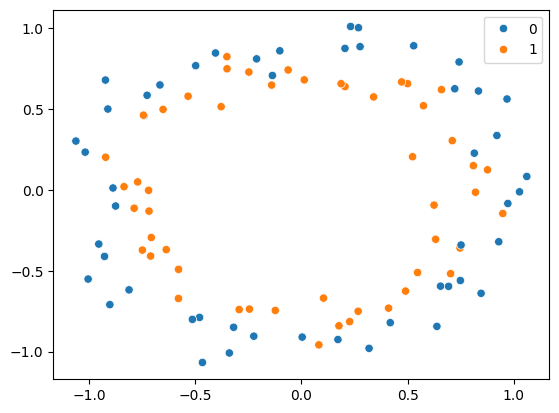

In [9]:
sns.scatterplot(x=X[:,0],y=X[:,1], hue=y)
plt.show()

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=2)

In [11]:
model=Sequential()
model.add(Dense(256,input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history=model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

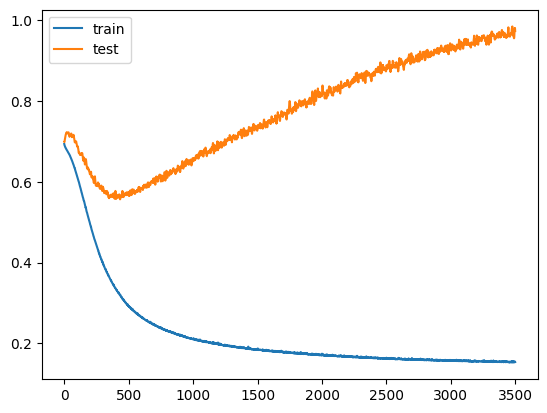

In [15]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


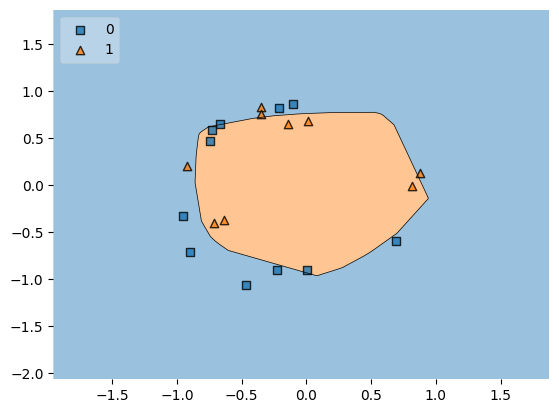

In [16]:
#decision boundary
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()

In [17]:
model=Sequential()
model.add(Dense(256,input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [24]:
history=model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=3500,  callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.5242 - loss: 0.6958 - val_accuracy: 0.3500 - val_loss: 0.6999
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4625 - loss: 0.6949 - val_accuracy: 0.3500 - val_loss: 0.7009
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4789 - loss: 0.6931 - val_accuracy: 0.3500 - val_loss: 0.7034
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5227 - loss: 0.6926 - val_accuracy: 0.3500 - val_loss: 0.7056
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.3000 - val_loss: 0.7074
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5539 - loss: 0.6887 - val_accuracy: 0.3500 - val_loss: 0.7095
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5047 - loss: 0.6887 - val_accuracy: 0.3000 - val_loss: 0.7117
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5461 - loss: 0.6855 - val_accuracy: 0.3500 - 

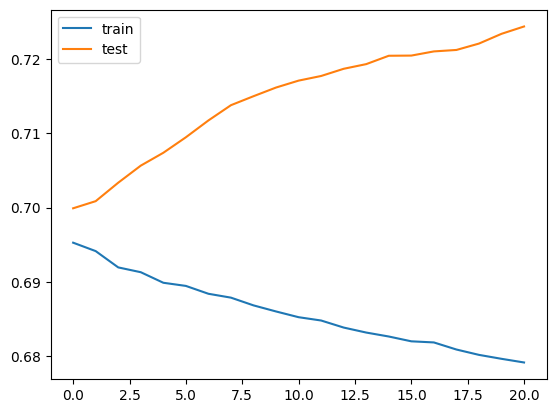

In [25]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()